In [24]:
import csv
from collections import defaultdict
import matplotlib.pyplot as plt
import copy

In [39]:
recalls = []
sizes   = []

with open('dataset_size_results.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        vals = copy.deepcopy(row)
        del vals['Dataset Size']
        size = int(row['Dataset Size'])
        sizes.append(size)
        recalls.append( vals )

In [40]:
precisions = []

with open('dataset_size_results_precision.csv') as f:
    reader = csv.DictReader(f)
    for row in reader:
        vals = copy.deepcopy(row)
        del vals['Dataset Size']
        size = int(row['Dataset Size'])
        precisions.append( vals )

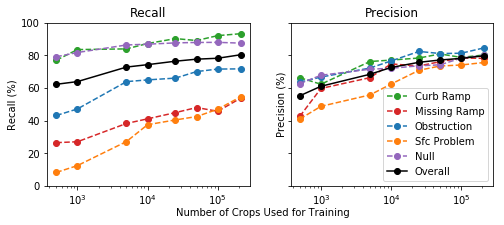

In [63]:
fig, axes = plt.subplots(1, 2, sharex='all', sharey='all', figsize=(8,3))
for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
    prec = []
    for i, size in enumerate(sizes):
        prec.append(float(precisions[i][label]))
    
    line   = 'dashed' if label != 'Overall' else 'solid'
    axes[1].plot(sizes, prec, label=label, linestyle=line, marker='o', color=color)
axes[1].set_xscale('log')
axes[1].set_ylim(0,100)
axes[1].set_ylabel("Precision (%)")
axes[1].set_title("Precision")

for label, color in (('Curb Ramp', 'C2'), ('Missing Ramp', 'C3'), ('Obstruction','C0'), ('Sfc Problem','C1'), ('Null','C4'), ('Overall','black')):
    rec = []
    for i, size in enumerate(sizes):
        rec.append(float(results[i][label]))
    
    line   = 'dashed' if label != 'Overall' else 'solid'
    axes[0].plot(sizes, rec, label=label, linestyle=line, marker='o', color=color)  
axes[0].set_xscale('log')
axes[0].set_ylim(0,100)
axes[0].set_ylabel("Recall (%)")
axes[0].set_title("Recall")
    
fig.text(0.5, 0.00, 'Number of Crops Used for Training', ha='center', va='center')
#axes[0].legend(loc=(1.02,.43))
axes[1].legend()
plt.savefig('/Users/galenweld/sidewalk-cv-assets19/figures_for_paper/pngs/amount_training_data.png', dpi = 300, bbox_inches = "tight")
plt.show()